In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

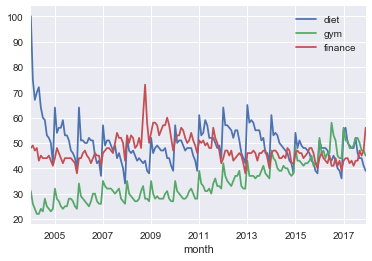

In [11]:
df = pd.read_csv('../multiTimeline.csv', parse_dates=['Month'],index_col='Month', skiprows=1)
df.columns = ['diet','gym','finance']
df.index.names = ['month']
df.plot()

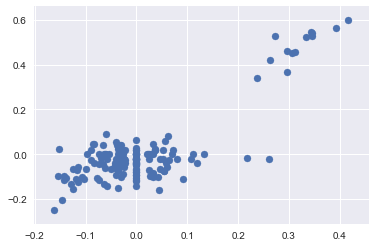

Corelation of gym and diet searching interest:  0.8243145584135215


In [10]:
df1 = df.pct_change()
plt.scatter(df1['gym'], df1['diet'])
plt.show()
correlation = df1['gym'].corr(df1['diet'])
print("Corelation of gym and diet searching interest: ", correlation)

In [25]:
import statsmodels.api as sm
df1 = df1[['diet','gym']]
df1 = sm.add_constant(df1)
df1 = df1.dropna()
results = sm.OLS(df1['gym'],df1[['const','diet']]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gym   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     349.8
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           1.28e-42
Time:                        15:49:34   Log-Likelihood:                 225.21
No. Observations:                 167   AIC:                            -446.4
Df Residuals:                     165   BIC:                            -440.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.005      1.120      0.2

The mean is 0.024 and the standard deviation is 0.049


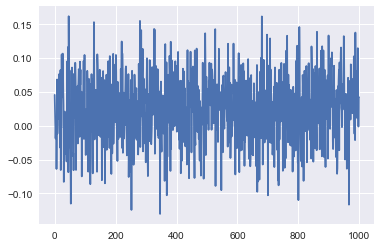

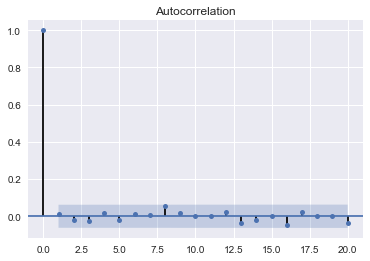

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))
plt.plot(returns)
plt.show()
plot_acf(returns, lags=20)
plt.show()

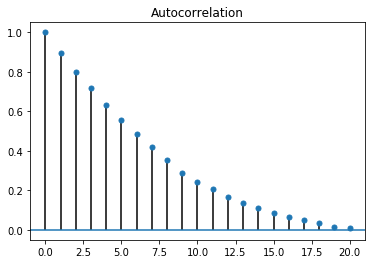

In [17]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plot 1: AR parameter = +0.9
# plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
#plt.plot(simulated_data_1)
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


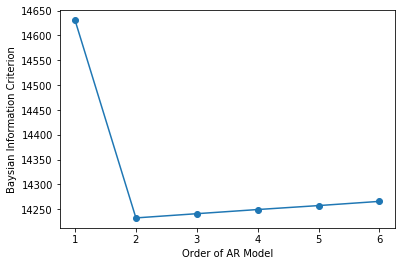

In [21]:
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)
from statsmodels.tsa.arima_model import ARMA
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()  
    BIC[p] = res.bic

plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Baysian Information Criterion')
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


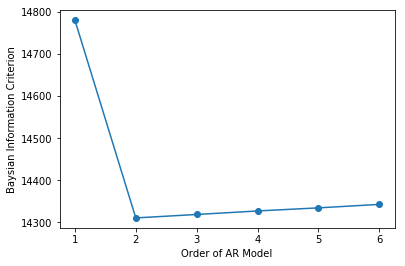